<a href="https://colab.research.google.com/github/a-singh03/DL-NLP/blob/main/DLNLP_Project2_ANN_for_Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Deep Learning Project**

**Objective: To create a Neural Network using Sign Language data.**

**Kaggle:** https://www.kaggle.com/datasets/datamunge/sign-language-mnist

**Importing required libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Display multiple commands output from a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:

import pandas as pd
from sklearn.preprocessing import StandardScaler

# 1.1
import tensorflow as tf

# 1.2 Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from IPython.display import Image
from tensorflow.keras.callbacks import EarlyStopping

**Connecting with google drive and Reading the data**

In [ ]:
#Mount google drive
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
data = pd.read_csv("/gdrive/MyDrive/Deep Learning/sign_mnist_train.csv")

In [ ]:
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [ ]:
pd.DataFrame({
    'X': ['Data Shape','Different number of labels','Different number of labels (Sum)' ],
    'Y': [data.shape, data.label.unique(), len(data.label.unique())],
})

,X,Y
0,Data Shape,"(27455, 785)"
1,Different number of labels,"[3, 6, 2, 13, 16, 8, 22, 18, 10, 20, 17, 19, 2..."
2,Different number of labels (Sum),24


**Separating the target from the data**

In [ ]:
y = data.pop('label')
X = data.values

**Plot for count of Label classes**

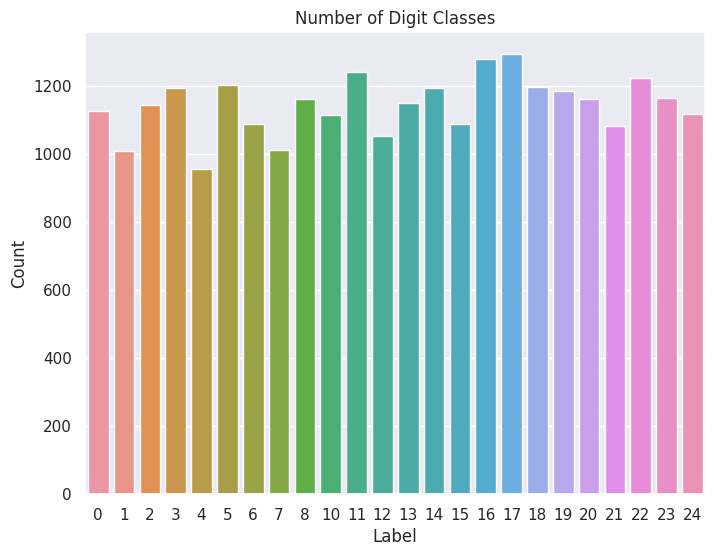

In [ ]:
# Create a count plot
sns.set(style="darkgrid")  # Set the style
plt.figure(figsize=(8, 6))  # Set the figure size
sns.countplot(x=y)  # Create the count plot using your data

# Add labels and a title
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Number of Digit Classes')

# Show the plot
plt.show();

**Sign Images in the data**

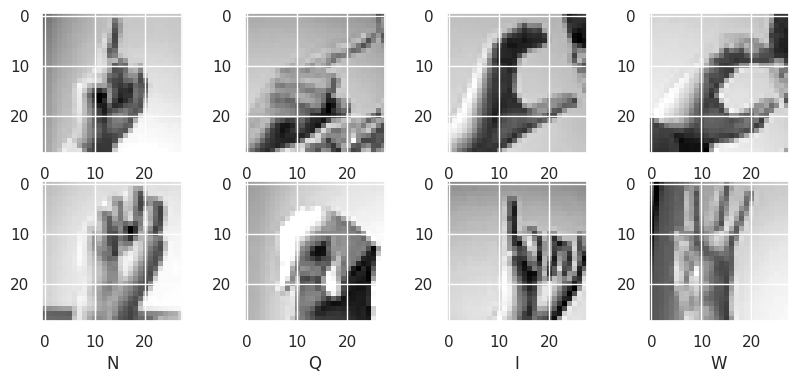

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure with subplots
fig, ax = plt.subplots(2, 4)
fig.set_size_inches(10, 4)

for i in range(2):
    for j in range(4):
        k = i * 4 + j  # Calculate the index
        img = X[k]  # Access the image from the NumPy array
        img = img.reshape((28, 28))  # Reshape if necessary

        ax[i, j].imshow(img, cmap='gray')  # Display the image
        ax[i, j].set_xlabel(chr(y[k] + 65))  # Set the label, assuming y contains class labels

plt.show();

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data.shape

(27455, 784)

In [ ]:
y.nunique()

24

**Label encoding for the target**

In [ ]:
# label encoding
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
y = label_binrizer.fit_transform(y)

**Splitting the data**

In [ ]:
|X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 11)

In [ ]:
from sklearn.model_selection import train_test_split
print("x_train shape",X_train.shape)
print("x_test shape",X_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

x_train shape (24709, 784)
x_test shape (2746, 784)
y_train shape (24709, 24)
y_test shape (2746, 24)


**Standard Scaling**

In [ ]:
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

StandardScaler()

**Creating the model**

In [ ]:
mx = tf.keras.Sequential()

In [ ]:
mx.add( tf.keras.layers.Input(shape = [784] ))

In [ ]:
mx.add(tf.keras.layers.Dense(500, activation = 'relu'))

In [ ]:
mx.add(tf.keras.layers.Dense(200, activation = 'selu'))

In [ ]:
mx.add(tf.keras.layers.Dense(24, activation = 'softmax'))

**Model Summary**

In [ ]:
mx.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 500)               392500    
                                                                 
 dense_7 (Dense)             (None, 200)               100200    
                                                                 
 dense_8 (Dense)             (None, 24)                4824      
                                                                 
Total params: 497,524
Trainable params: 497,524
Non-trainable params: 0
_________________________________________________________________


**Compling the model**

In [ ]:
mx.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

**Fitting the train data in the model**

In [ ]:
history =  mx.fit(X_train, y_train, epochs=50)


Epoch 1/50
773/773 [==============================] - 9s 10ms/step - loss: 0.3554 - accuracy: 0.9000
Epoch 2/50
773/773 [==============================] - 7s 10ms/step - loss: 0.1045 - accuracy: 0.9719
Epoch 3/50
773/773 [==============================] - 6s 8ms/step - loss: 0.0613 - accuracy: 0.9853
Epoch 4/50
773/773 [==============================] - 8s 10ms/step - loss: 1.7084e-04 - accuracy: 1.0000
Epoch 5/50
773/773 [==============================] - 6s 8ms/step - loss: 8.8655e-05 - accuracy: 1.0000
Epoch 6/50
773/773 [==============================] - 10s 13ms/step - loss: 5.8552e-05 - accuracy: 1.0000
Epoch 7/50
773/773 [==============================] - 10s 12ms/step - loss: 4.0536e-05 - accuracy: 1.0000
Epoch 8/50
773/773 [==============================] - 8s 11ms/step - loss: 2.8360e-05 - accuracy: 1.0000
Epoch 9/50
773/773 [==============================] - 9s 11ms/step - loss: 2.0123e-05 - accuracy: 1.0000
Epoch 10/50
773/773 [==============================] - 6s 8ms/step 

**Plot for Training Loss**

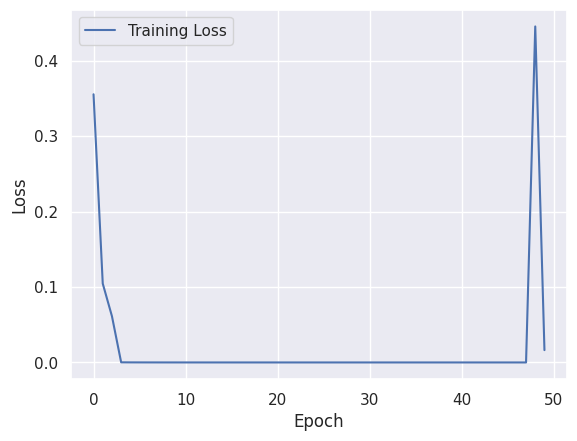

In [ ]:
# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show();

**Plot for Training Accuracy**

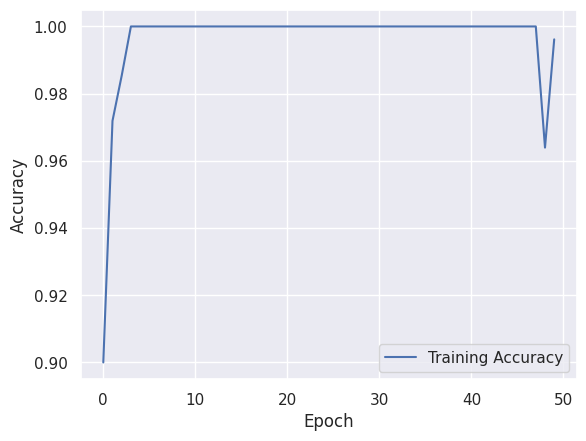

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show();

**Test Loss & Accuracy**

In [ ]:
test_loss,test_accuracy=mx.evaluate(X_test,y_test)
print("test_loss",test_loss,"\n","test_accuracy",test_accuracy)

86/86 [==============================] - 0s 3ms/step - loss: 0.0320 - accuracy: 0.9905
test_loss 0.03201315179467201 
 test_accuracy 0.9905316829681396


**1. Test Loss:** The calculated test loss is 0.0320. This test loss, similar to the training loss, gauges how well the model's predictions correspond to the actual target values, albeit on the test dataset.

**2. Test Accuracy:** The test accuracy is measured as 0.9905, which corresponds to around 99.05%. This result implies that the model accurately predicted approximately 99.05% of the samples present in the test dataset.

**3.** The model demonstrates high accuracy and low loss in test datasets. This suggests that the model has effectively learned the underlying patterns inherent in the train data and successfully generalized its predictions to new, previously unseen test data.

**THE END**